In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Laboratory work 1

Reading database

In [52]:
df = pd.read_csv('global.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\4067751759.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global.csv', encoding='ISO-8859-1')


Shape of the database

In [53]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df.head()

The DataFrame has 181691 rows.
The DataFrame has 135 columns.


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


1. Preprocessing

a. Visualisation

Filling in empty elements

In [54]:
df["target1"] = df["target1"].fillna("Unknown (auto)")

Terrorist acts related to the military

In [55]:
df.loc[df['target1'].str.contains("Soldier|Military|soldier|military")][["iyear","nkill","imonth", "country_txt", "target1"]]

,iyear,nkill,imonth,country_txt,target1
16,1970,1.0,1,Ethiopia,Soldier
160,1970,0.0,3,United States,"Military courthouse, Fort Benning Georgia"
289,1970,0.0,5,Uruguay,"Residence, Sgt. Selby Stevens, US Military Mis..."
328,1970,0.0,6,Jordan,Military Attache
575,1970,0.0,10,Turkey,U.S. Military Annex Exchange
...,...,...,...,...,...
181571,2017,0.0,12,Mali,Soldiers
181601,2017,3.0,12,Mali,Soldiers
181622,2017,1.0,12,Egypt,Battalion 103 Soldiers
181640,2017,NaN,12,Iraq,Soldiers


Removal of terrorist acts related to the military

In [56]:
#df = df[~df.index.isin(df.loc[df['target1'].str.contains("Soldier|Military|soldier|military")].index)]
df = df[df["target1"].str.contains("Soldier|Military|soldier|military") == False]
df.sort_values (by = ['nkill'], ascending = [False ])[["iyear","nkill","imonth", "country_txt", "target1"]].head()

,iyear,nkill,imonth,country_txt,target1
73126,2001,1384.0,9,United States,Passengers and crew members on American Airlin...
73127,2001,1383.0,9,United States,Passengers and crew members on United Airlines...
55934,1994,1180.0,4,Rwanda,Group of Tutsi Refugees inside Catholic Church
136283,2014,953.0,8,Iraq,Yizidi Civilians
133225,2014,670.0,6,Iraq,Badush Prison


Number of terrorist acts by year

array([[<Axes: title={'center': 'iyear'}>]], dtype=object)

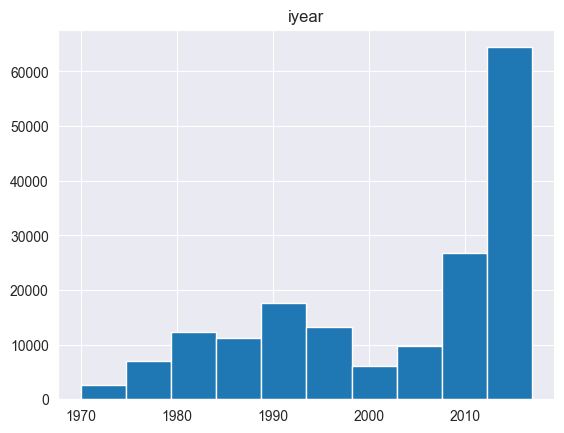

In [57]:
df.hist(column="iyear")

Years during which certain terrorist acts were more common

<Axes: title={'center': 'iyear'}, xlabel='attacktype1_txt'>

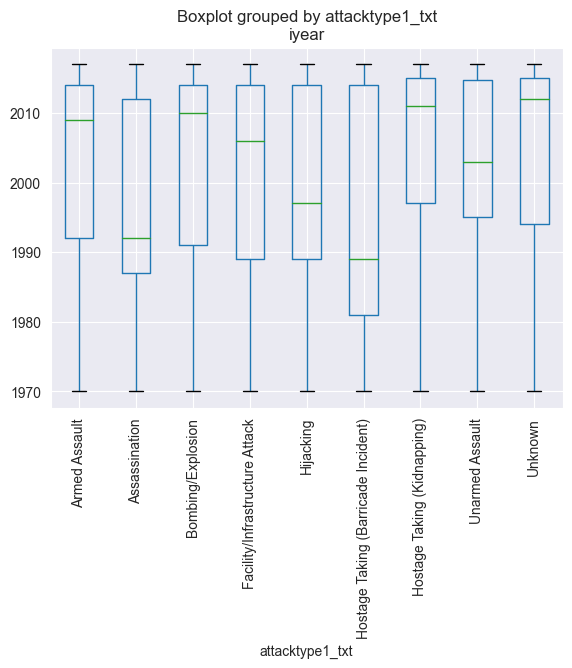

In [58]:
df.boxplot(column=["iyear"], by="attacktype1_txt", rot = 90)

The relationship between the year of the terrorist act and the number of victims

<Axes: xlabel='iyear', ylabel='nkill'>

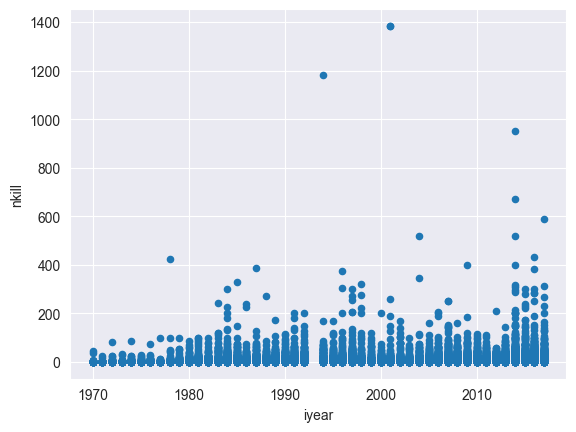

In [59]:
df.plot.scatter(y="nkill",x="iyear")

Acts with the largest number of victims

In [60]:
df.sort_values (by = ['nkill'], ascending = [False ])[["iyear","nkill","imonth", "country_txt", "target1"]].head()

,iyear,nkill,imonth,country_txt,target1
73126,2001,1384.0,9,United States,Passengers and crew members on American Airlin...
73127,2001,1383.0,9,United States,Passengers and crew members on United Airlines...
55934,1994,1180.0,4,Rwanda,Group of Tutsi Refugees inside Catholic Church
136283,2014,953.0,8,Iraq,Yizidi Civilians
133225,2014,670.0,6,Iraq,Badush Prison


b. Cleaning data

Removal spaces in dataset

In [61]:
df = df.dropna(axis=1, thresh=100000)
df = df.dropna(axis=0, thresh=40)
df = df.drop_duplicates()
row_count = df.shape[0]
column_count = df.shape[1]

In [62]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df.head()

The DataFrame has 171360 rows.
The DataFrame has 58 columns.


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


All terrorist acts that happened at 11/09/2001

In [63]:
df.loc[(df['imonth'] == 9) & (df['iday'] == 11) & (df['iyear'] == 2001)]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
73123,200109110001,2001,9,11,0,34,Burundi,11,Sub-Saharan Africa,Mwaro,...,0.0,0.0,0,0.0,"""Burundi: Rebels Ambush Minibus North of Bujum...",CETIS,-9,-9,0,-9
73124,200109110002,2001,9,11,0,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,North Kivu,...,0.0,0.0,0,0.0,"""DRCongo: Four Killed in Shooting in Rebel Hel...",CETIS,-9,-9,0,-9
73125,200109110003,2001,9,11,0,97,Israel,10,Middle East & North Africa,Haifa,...,0.0,0.0,0,0.0,"""Two Border Policemen Killed, One Wounded in a...",CETIS,-9,-9,0,-9
73126,200109110004,2001,9,11,0,217,United States,1,North America,New York,...,NaN,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73127,200109110005,2001,9,11,0,217,United States,1,North America,New York,...,NaN,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73128,200109110006,2001,9,11,0,217,United States,1,North America,Virginia,...,NaN,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73129,200109110007,2001,9,11,0,217,United States,1,North America,Pennsylvania,...,6.0,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73130,200109110008,2001,9,11,0,12,Armenia,7,Central Asia,Yerevan,...,0.0,0.0,-9,0.0,"""Armenia killing,"" Associated Press, September...",UMD Schmid 2012,-9,-9,0,-9


Removal columns that contain not numbers

In [64]:
df = df.select_dtypes(include='number')
df = df.fillna(0)
df = df[["iyear", "extended", "region", "nkill", "nwound", "attacktype1", "nperps"]]
df = df.loc[df['nperps'] < 1000]
df = df.replace([-99], 1)
df

,iyear,extended,region,nkill,nwound,attacktype1,nperps
0,1970,0,2,1.0,0.0,1,0.0
1,1970,0,1,0.0,0.0,6,7.0
2,1970,0,5,1.0,0.0,1,0.0
3,1970,0,8,0.0,0.0,3,0.0
4,1970,0,4,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...
181686,2017,0,11,1.0,2.0,2,1.0
181687,2017,0,10,2.0,7.0,3,1.0
181688,2017,0,5,0.0,0.0,7,1.0
181689,2017,0,6,0.0,0.0,3,1.0


In [65]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df[['region']]). toarray ())
encoder_df.columns = [ "North America", "Central America & Caribbean", "South America", "Southeast Asia", "East Asia", "South Asia", "Central Asia", "Western Europe",  "Eastern Europe",  "Middle East & North Africa",  "Sub-Saharan Africa",  "Australasia & Oceania"]
final_df = df.join(encoder_df)
final_df.head()

,iyear,extended,region,nkill,nwound,attacktype1,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,South Asia,Central Asia,Western Europe,Eastern Europe,Middle East & North Africa,Sub-Saharan Africa,Australasia & Oceania
0,1970,0,2,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,1,0.0,0.0,6,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970,0,5,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,8,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1970,0,4,0.0,0.0,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
final_df.drop('region', axis= 1 , inplace= True )

df = final_df
df.head()

,iyear,extended,nkill,nwound,attacktype1,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,South Asia,Central Asia,Western Europe,Eastern Europe,Middle East & North Africa,Sub-Saharan Africa,Australasia & Oceania
0,1970,0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,6,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df[['attacktype1']]). toarray ())
encoder_df.columns = [ "Assassination", "Armed Assault", "Bombing/Explosion", "Hijacking", "Hostage Taking (Barricade Incident)", "Hostage Taking (Kidnapping)", "Facility/Infrastructure Attack", "Unarmed Assault",  "Unknown"]
final_df = df.join(encoder_df)
final_df.head()

,iyear,extended,nkill,nwound,attacktype1,nperps,North America,Central America & Caribbean,South America,Southeast Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,1970,0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,6,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,7,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
final_df.drop('attacktype1', axis= 1 , inplace= True )

df = final_df
df = df.fillna(0)
df.head()

,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,1970,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Normalization by median

In [69]:
df = df.fillna(0)
#scaler = StandardScaler()
#scaler.fit(df.drop("nkill", axis=1))
#scaled_data = pd.DataFrame(scaler.transform(df.drop("nkill", axis=1)))
#df = (df-df.median ())/df.std()
df.head()
#scaled_data

,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,1970,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


c. Correlations

Correlation matrix

<Axes: >

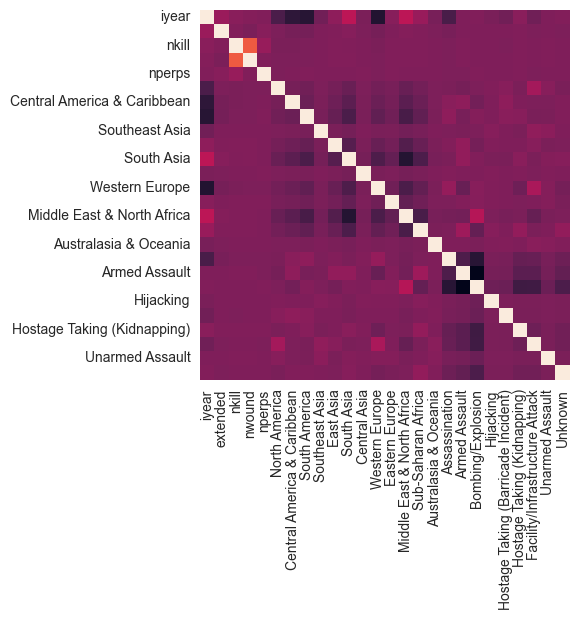

In [70]:
corr = df.corr()
sns.heatmap(corr, cbar=False, square=True)

The most correlating params

In [71]:
corrs = [(corr.iloc[row,col], row, col) for row in range(1, 6) for col in range(row)]
max = sorted(corrs, key=lambda x: abs(x[0]), reverse=True)[:10]
for m in max:
    print("Correlation: " + str(m[0]))
    print(corr.iloc[[m[1], m[2]]][[]])
    print("")

Correlation: 0.4869194892244996
Empty DataFrame
Columns: []
Index: [nwound, nkill]

Correlation: -0.18575214110587662
Empty DataFrame
Columns: []
Index: [North America, iyear]

Correlation: 0.0906544561301147
Empty DataFrame
Columns: []
Index: [extended, iyear]

Correlation: 0.07939329743858578
Empty DataFrame
Columns: []
Index: [nperps, nkill]

Correlation: 0.032707522916070944
Empty DataFrame
Columns: []
Index: [nkill, iyear]

Correlation: 0.02978806794378546
Empty DataFrame
Columns: []
Index: [nperps, extended]

Correlation: 0.01710151079962815
Empty DataFrame
Columns: []
Index: [nwound, iyear]

Correlation: 0.012428435479139344
Empty DataFrame
Columns: []
Index: [nkill, extended]

Correlation: -0.010941911303732836
Empty DataFrame
Columns: []
Index: [North America, nkill]

Correlation: -0.010452048039173958
Empty DataFrame
Columns: []
Index: [nwound, extended]


Removal most correlating and non-informing columns

In [72]:
#df = df.drop(columns=["eventid", "latitude", "longitude", "INT_LOG", "INT_MISC", "INT_IDEO", "INT_ANY"])

Exporting CSV for Lab02

In [73]:
df.to_csv(r'D:\Programming\Python\MLLab01\global_preprocessed.csv', index= False )

Laboratory work 2

1. Model training and parameter selection using Grid Search

In [74]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [75]:
x_test

,iyear,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,South Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
54217,1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101393,2011,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
136263,2014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171122,2017,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125839,2014,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179878,2017,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142390,2015,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55610,1994,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3368,1975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
y_test

54217     0
101393    0
136263    0
171122    0
125839    0
         ..
179878    0
142390    0
55610     0
3368      0
152525    0
Name: extended, Length: 42820, dtype: int64

a. K-nearest neighbors (KNN)

In [77]:
error_rates = []
for i in np.arange(5, 21):
    new_model = KNeighborsClassifier(n_neighbors=i)
    new_model.fit(x_train, y_train)
    new_predictions = new_model.predict(x_test.values)
    error_rates.append(np.mean(new_predictions != y_test))

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
plt.plot(error_rates)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn_model = knn.fit(x_train, y_train)

In [ ]:
y_predicted = knn_model.predict(df[["iyear", "nkill", "nwound", "nperps", "North America", "Central America & Caribbean", "South America", "Southeast Asia", "East Asia", "South Asia", "Central Asia", "Western Europe",  "Eastern Europe",  "Middle East & North Africa",  "Sub-Saharan Africa",  "Australasia & Oceania", "Assassination", "Armed Assault", "Bombing/Explosion", "Hijacking", "Hostage Taking (Barricade Incident)", "Hostage Taking (Kidnapping)", "Facility/Infrastructure Attack", "Unarmed Assault",  "Unknown"]].values)
df["kclass"] = y_predicted


In [ ]:
df0 = df[df.kclass==0]
df1 = df[df.kclass==1]
plt.scatter(df0["nkill"], df0["nperps"], color="red")
plt.scatter(df1["nkill"], df1["nperps"], color="green")

plt.xlabel("nkill")
plt.ylabel("nperps")

In [ ]:
df0 = df[df.extended==0]
df1 = df[df.extended==1]
plt.scatter(df0["nkill"], df0["nperps"], color="red")
plt.scatter(df1["nkill"], df1["nperps"], color="green")

plt.xlabel("nkill")
plt.ylabel("nperps")

b. Support Vector Classification (SVM)

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)
clf.predict(df[["iyear", "nkill", "nwound", "nperps", "North America", "Central America & Caribbean", "South America", "Southeast Asia", "East Asia", "South Asia", "Central Asia", "Western Europe",  "Eastern Europe",  "Middle East & North Africa",  "Sub-Saharan Africa",  "Australasia & Oceania", "Assassination", "Armed Assault", "Bombing/Explosion", "Hijacking", "Hostage Taking (Barricade Incident)", "Hostage Taking (Kidnapping)", "Facility/Infrastructure Attack", "Unarmed Assault",  "Unknown"]].values)